<a href="https://colab.research.google.com/github/Kiran771/AI_churn_prediction/blob/main/Copy_of_AI_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay,classification_report, f1_score, precision_score, recall_score,roc_curve, auc,precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

In [ ]:
# load dataset
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
# view first 5 row of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# shape of the dataset
df.shape

(10000, 14)

In [ ]:
# Generating descriptive statistics to analyze feature distributions, scales, and potential outliers
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Display columns in the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Data schema validation and null-value check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


([<matplotlib.patches.Wedge at 0x78fba44cd460>,
 [Text(-0.6568643701797422, -0.8823430167391653, '0'),
  Text(0.6568640826758595, 0.8823432307726976, '1')],
 [Text(-0.3582896564616775, -0.4812780091304537, '79.6%'),
  Text(0.3582894996413779, 0.4812781258760168, '20.4%')])

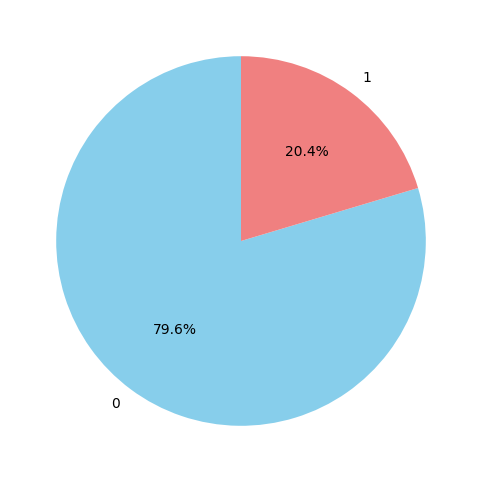

In [ ]:
## Plot class distribution
counts=df['Exited'].value_counts()
labels = counts.index
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# df['Balance_to_Salary'] = df['Balance'] / (df['EstimatedSalary'] + 1e-5)
# df['Tenure_to_Age'] = df['Tenure'] / (df['Age'] + 1e-5)
# df['Age_Balance'] = df['Age'] * df['Balance']
# df['Products_CreditCard'] = df['NumOfProducts'] * df['HasCrCard']
# df['Gender_Geography'] = df['Gender'] + '_' + df['Geography']



In [ ]:
x = df.drop('Exited', axis=1)
y = df['Exited']


In [ ]:
# split train and test
x_train,x_test, y_train, y_test = train_test_split(
     x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# split train and validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train,y_train,
    test_size=0.25,
    random_state=42,
    stratify=y_train
)

In [ ]:
categorical_cols = ['Geography', 'Gender']

numeric_cols = x_train.columns.difference(categorical_cols)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

In [ ]:
x_train_p = preprocessor.fit_transform(x_train)
x_val_p=preprocessor.transform(x_val)
x_test_p=preprocessor.transform(x_test)

In [ ]:
feature_names = preprocessor.get_feature_names_out()

# Convert to DataFrame
X_df = pd.DataFrame(x_train_p.toarray() if hasattr(x_train_p, "toarray") else x_train_p, columns=feature_names)
corr_matrix = X_df.corr()

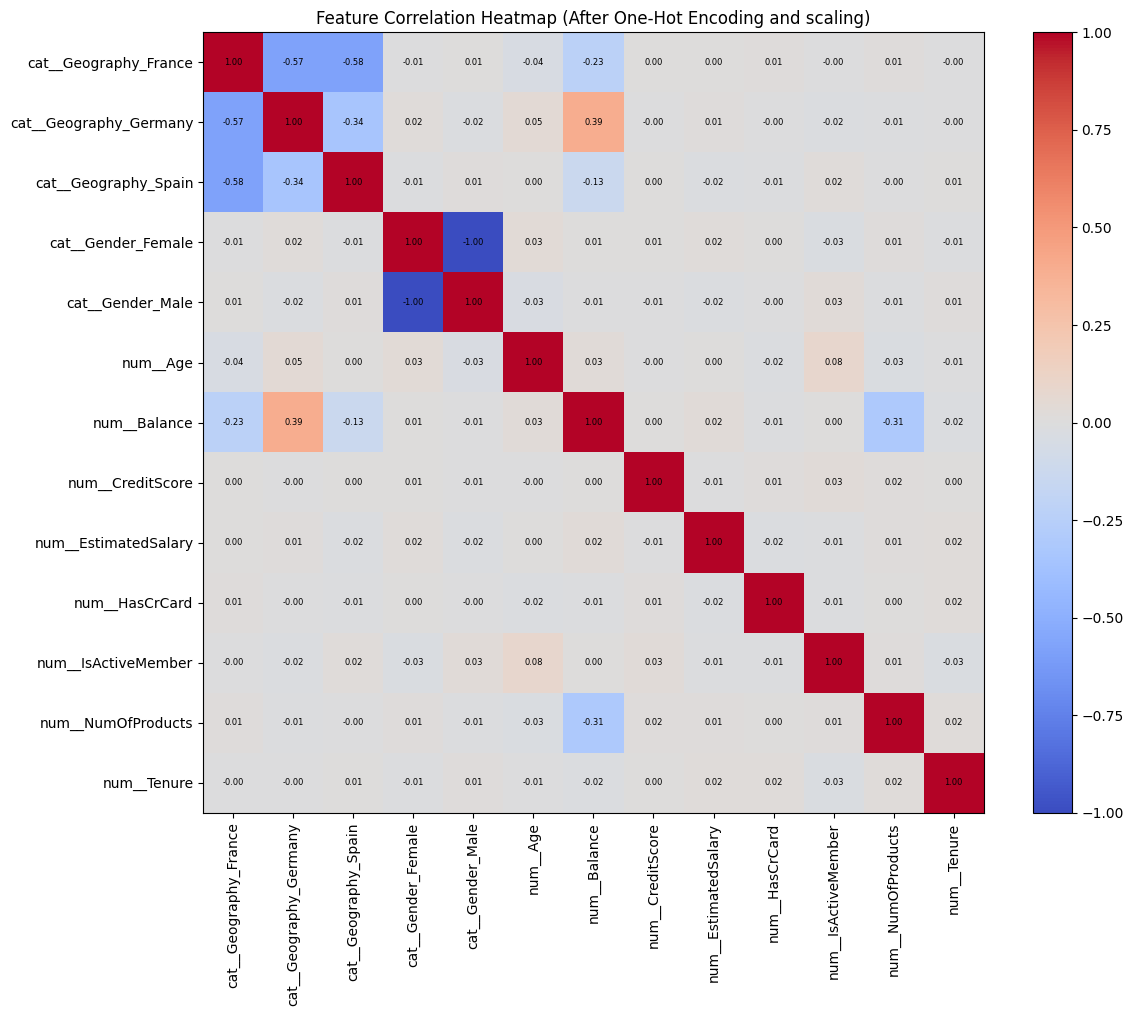

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

# Heatmap
cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

# Add correlation values inside cells (optional)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                ha='center', va='center', fontsize=6)

ax.set_title("Feature Correlation Heatmap (After One-Hot Encoding and scaling)")
plt.tight_layout()
plt.show()


In [ ]:
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train_p, y_train)

In [ ]:
print("Before Bsmote:", x_train_p.shape, y_train.value_counts())
print("After Bsmote: ", x_train_res.shape, y_train_res.value_counts())

Before Bsmote: (6000, 13) Exited
0    4777
1    1223
Name: count, dtype: int64
After Bsmote:  (9554, 13) Exited
0    4777
1    4777
Name: count, dtype: int64


In [ ]:
classes = np.unique(y_train)

weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)


class_weight = {classes[i]: weights[i] for i in range(len(classes))}
print("Class weights:", class_weight)

Class weights: {np.int64(0): np.float64(0.6280092108017584), np.int64(1): np.float64(2.4529844644317254)}


# Logistic Regression

In [ ]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate, lambda_reg, n_iterations,class_weight=None):
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.n_iterations = n_iterations
        self.class_weight = class_weight if class_weight is not None else {0:1, 1:1}

        self.weights = None
        self.bias = None

        self.cost_history = []
        self.val_loss_history = []

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y, predictions):
        m = len(y)
        epsilon = 1e-15
        predictions = np.clip(predictions, epsilon, 1 - epsilon)

        w0 = self.class_weight[0]
        w1 = self.class_weight[1]

        weighted_loss = -np.mean(
          w1 * y * np.log(predictions) +
          w0 * (1 - y) * np.log(1 - predictions)
        )

        # L2 regularization
        l2_penalty = (self.lambda_reg / (2 * m)) * np.sum(self.weights ** 2)

        return weighted_loss + l2_penalty


    def fit(self, X_train, y_train, X_val=None, y_val=None):
        np.random.seed(42)
        m, n = X_train.shape

        self.weights = np.random.randn(n) * 0.01
        self.bias = 0

        has_validation = X_val is not None and y_val is not None

        for iteration in range(self.n_iterations):
            # Forward pass
            linear_output = np.dot(X_train, self.weights) + self.bias
            predictions = self.sigmoid(linear_output)

            # Cost tracking
            if iteration % 100 == 0:
                cost = self.compute_cost(X_train, y_train, predictions)
                self.cost_history.append(cost)

                if has_validation:
                    val_preds = self.sigmoid(np.dot(X_val, self.weights) + self.bias)
                    val_cost = self.compute_cost(X_val, y_val, val_preds)
                    self.val_loss_history.append(val_cost)
                    print(f"Epoch {iteration:4d}: Train_loss={cost:.6f}, Val_loss={val_cost:.6f}")
                else:
                    print(f"Epoch {iteration:4d}: Train={cost:.6f}")

            # Backward pass
            errors = predictions - y_train
            dw = (1 / m) * np.dot(X_train.T, errors) + (self.lambda_reg / m) * self.weights
            db = (1 / m) * np.sum(errors)

            # Update
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        # Final cost
        final_preds = self.sigmoid(np.dot(X_train, self.weights) + self.bias)
        final_cost = self.compute_cost(X_train, y_train, final_preds)

        print("\nTraining complete!")
        print(f"Final training cost: {final_cost:.6f}")

    def prediction_prob(self, X):
        if self.weights is None:
            raise ValueError("Model not trained yet.")
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    # def predict(self, X, threshold=0.5):
    #     probs = self.prediction_prob(X)
    #     return (probs >= threshold).astype(int)

    # def predict(self, X, threshold=0.3):
    #     probs = self.prediction_prob(X)
    #     return (probs >= threshold).astype(int)

    def predict(self, X, threshold=0.495):
        probs = self.prediction_prob(X)
        return (probs >= threshold).astype(int)

In [ ]:
# model=LogisticRegressionScratch(
#     learning_rate=0.01,
#     lambda_reg=0.01,
#     n_iterations=3000,
#     class_weight={0:1, 1:3}
# )

In [ ]:
model=LogisticRegressionScratch(
    learning_rate=0.01,
    lambda_reg=0.01,
    n_iterations=2000,
    class_weight = {0:1, 1:3}
)

In [ ]:
model.fit(
    x_train_res, y_train_res,
    X_val=x_val_p, y_val=y_val
)

Epoch    0: Train_loss=1.377561, Val_loss=0.974844
Epoch  100: Train_loss=1.277046, Val_loss=0.920530
Epoch  200: Train_loss=1.220594, Val_loss=0.887699
Epoch  300: Train_loss=1.187431, Val_loss=0.866902
Epoch  400: Train_loss=1.167118, Val_loss=0.853210
Epoch  500: Train_loss=1.154219, Val_loss=0.843920
Epoch  600: Train_loss=1.145774, Val_loss=0.837466
Epoch  700: Train_loss=1.140094, Val_loss=0.832897
Epoch  800: Train_loss=1.136183, Val_loss=0.829613
Epoch  900: Train_loss=1.133428, Val_loss=0.827219
Epoch 1000: Train_loss=1.131449, Val_loss=0.825455
Epoch 1100: Train_loss=1.129998, Val_loss=0.824141
Epoch 1200: Train_loss=1.128914, Val_loss=0.823152
Epoch 1300: Train_loss=1.128088, Val_loss=0.822400
Epoch 1400: Train_loss=1.127447, Val_loss=0.821824
Epoch 1500: Train_loss=1.126940, Val_loss=0.821377
Epoch 1600: Train_loss=1.126532, Val_loss=0.821028
Epoch 1700: Train_loss=1.126197, Val_loss=0.820751
Epoch 1800: Train_loss=1.125918, Val_loss=0.820530
Epoch 1900: Train_loss=1.125681

In [ ]:
y_test_pred = model.predict(x_test_p)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1135  458]
 [ 119  288]]


In [ ]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



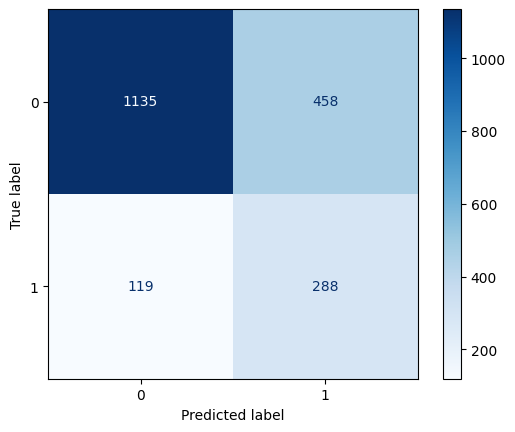

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')

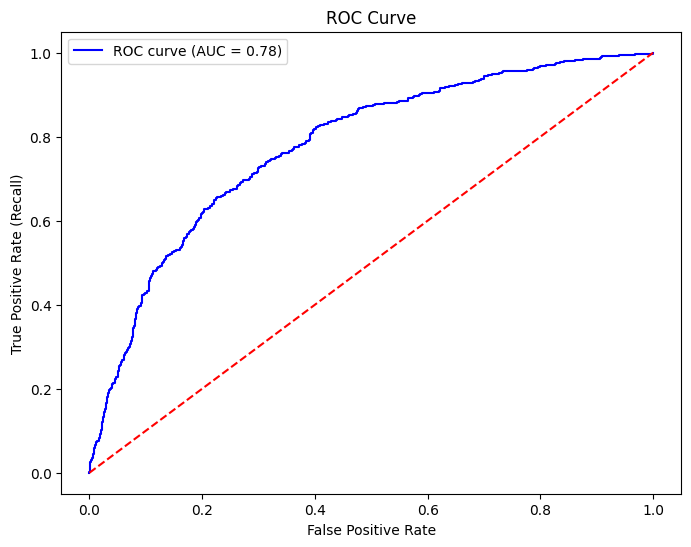

In [ ]:
y_prob = model.prediction_prob(x_test_p)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

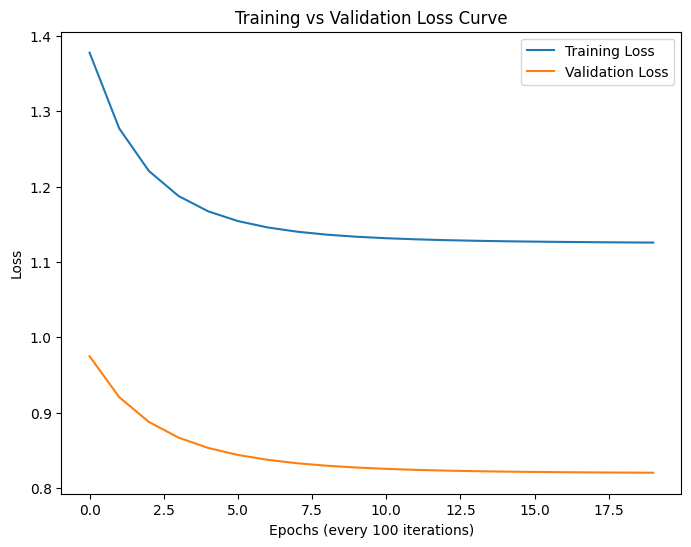

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(model.cost_history, label='Training Loss')
plt.plot(model.val_loss_history, label='Validation Loss')
plt.xlabel('Epochs (every 100 iterations)')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss Curve')
plt.legend()
plt.show()


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight='balanced',
    oob_score=True,
    warm_start=True,
    random_state=42
)



In [ ]:
rf_model.fit(x_train_res, y_train_res)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200,
                       oob_score=True, random_state=42, warm_start=True)

In [ ]:
y_test_pred_rf = rf_model.predict(x_test_p)
y_prob_rf = rf_model.predict_proba(x_test_p)[:,1]

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1593
           1       0.55      0.70      0.62       407

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000



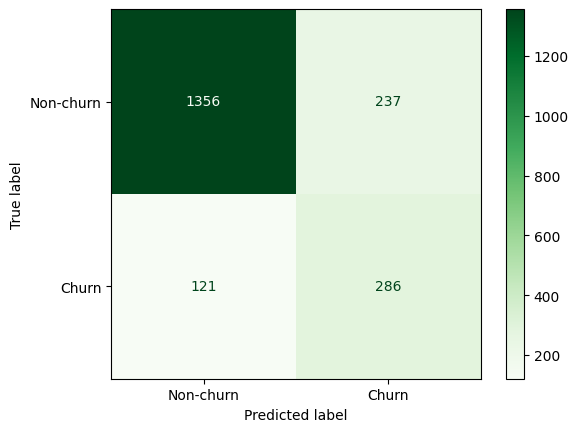

In [ ]:
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Non-churn','Churn'])
disp_rf.plot(cmap='Greens')


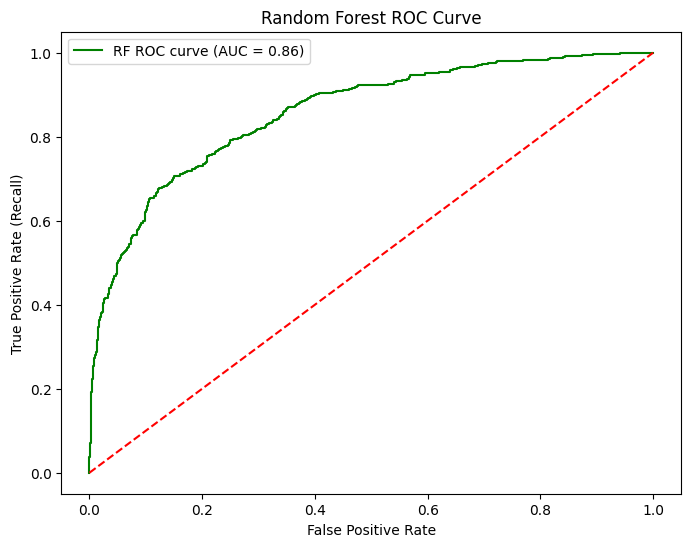

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

## Precision Recal curve - RF

In [ ]:
y_test_prob = rf_model.predict_proba(x_test_p)[:, 1]

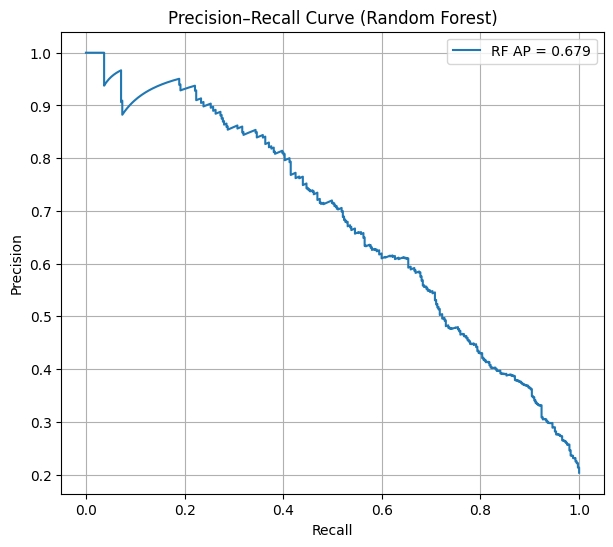

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)
avg_precision = average_precision_score(y_test, y_test_prob)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, label=f'RF AP = {avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-2621989567.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


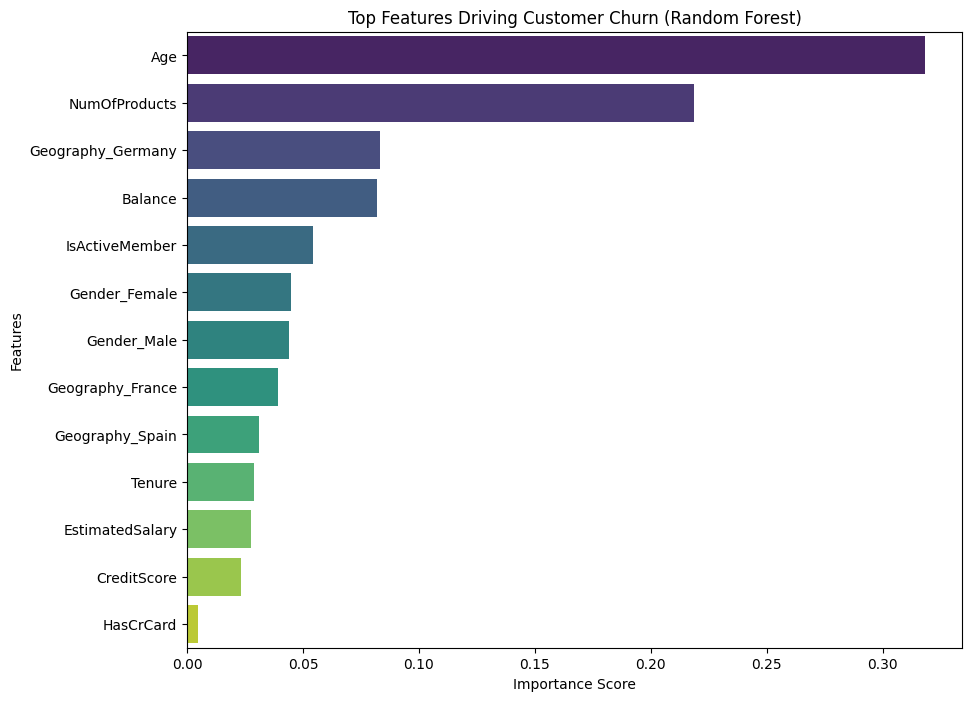

In [ ]:

cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([cat_features, numeric_cols])


importances = rf_model.feature_importances_

# 3. Create a DataFrame for easy plotting
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top Features Driving Customer Churn (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

In [611]:
# Define Focal Loss function
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)

        # Calculate focal loss
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        focal_weight = K.pow(1. - pt, gamma)

        # Binary cross entropy
        bce = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)

        # Apply focal weight and alpha
        focal = alpha * focal_weight * bce

        return K.mean(focal)
    return focal_loss_fixed


In [629]:
model = Sequential([
    Input(shape=(x_train_p.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [630]:
# compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=focal_loss(gamma=3.0, alpha=0.80),
    metrics=['accuracy']
)

In [631]:
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [632]:
# Train the model
history = model.fit(
    x_train_p, y_train,
    validation_data=(x_val_p, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7644 - loss: 0.3271 - val_accuracy: 0.8135 - val_loss: 0.2857
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8081 - loss: 0.2780 - val_accuracy: 0.8235 - val_loss: 0.2477
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8149 - loss: 0.2408 - val_accuracy: 0.8290 - val_loss: 0.2156
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8239 - loss: 0.2102 - val_accuracy: 0.8335 - val_loss: 0.1888
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8349 - loss: 0.1838 - val_accuracy: 0.8365 - val_loss: 0.1663
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8298 - loss: 0.1625 - val_accuracy: 0.8415 - val_loss: 0.1472
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8388 - loss: 0.1439 - val_accuracy: 0.8455 - val_loss: 0.1315
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8456 - loss: 0.1282 - val_accuracy:

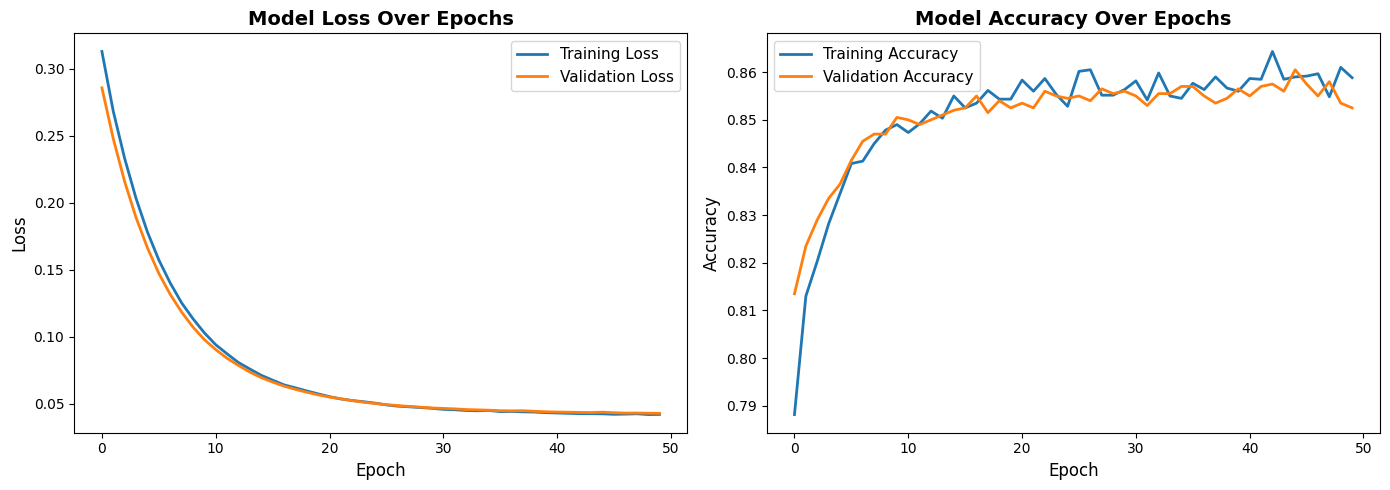

In [633]:
import matplotlib.pyplot as plt

# Plot Training and Validation Loss
plt.figure(figsize=(14, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)


# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)


plt.tight_layout()
plt.show()


In [634]:
# model performance for test dataset
y_pred_prob = model.predict(x_test_p)
# threshold=0.3
threshold = 0.45
y_pred = (y_pred_prob >= threshold).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [635]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1593
           1       0.61      0.63      0.62       407

    accuracy                           0.84      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.84      0.84      2000



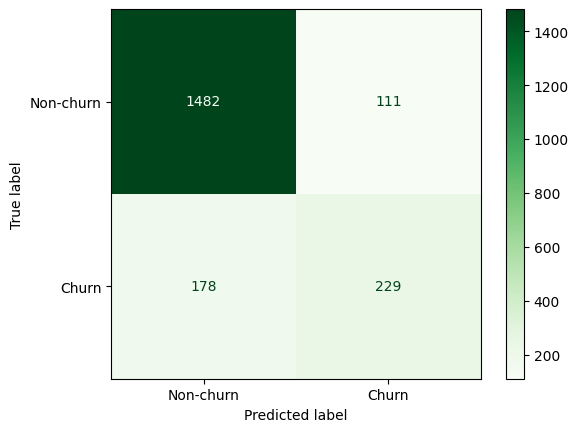

In [619]:
cm_nn = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['Non-churn','Churn'])
disp_rf.plot(cmap='Greens')


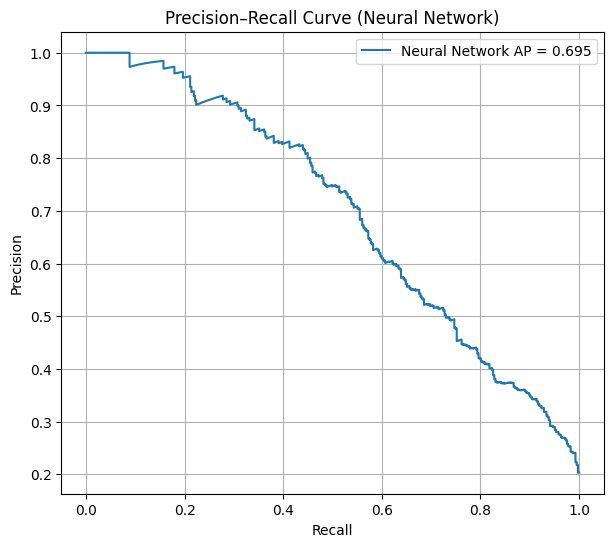

In [620]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, label=f'Neural Network AP = {avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()

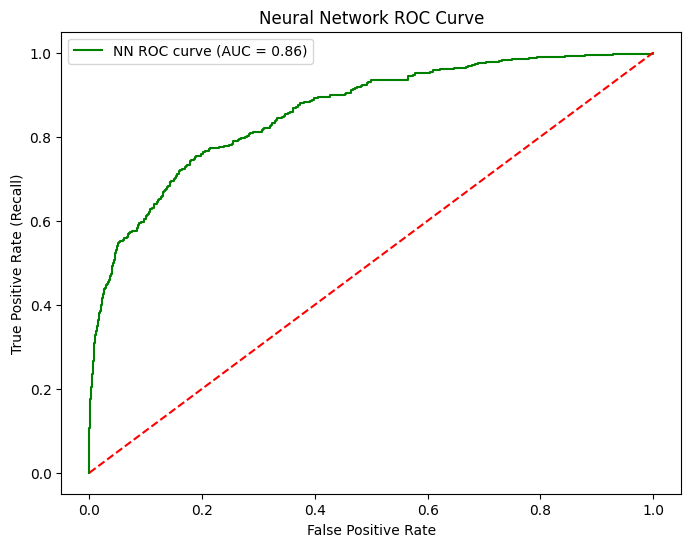

In [610]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'NN ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Neural Network ROC Curve')
plt.legend()
plt.show()